In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D
import warnings

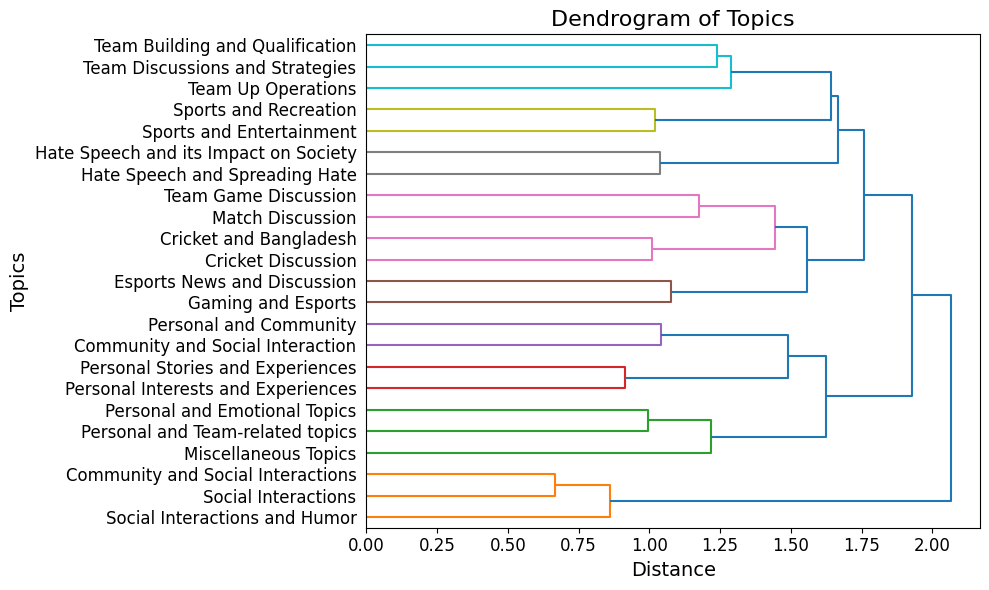

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

topics = [
    'Personal and Emotional Topics',
    'Cricket Discussion',
    'Social Interactions',
    'Hate Speech and its Impact on Society',
    'Cricket and Bangladesh',
    'Sports and Recreation',
    'Personal and Community',
    'Miscellaneous Topics',
    'Personal Stories and Experiences',
    'Social Interactions and Humor',
    'Community and Social Interaction',
    'Team Discussions and Strategies',
    'Personal and Community',
    'Team Game Discussion',
    'Esports News and Discussion',
    'Match Discussion',
    'Personal and Community',
    'Sports and Entertainment',
    'Hate Speech and Spreading Hate',
    'Team Up Operations',
    'Gaming and Esports',
    'Team Building and Qualification',
    'Community and Social Interaction',
    'Miscellaneous Topics',
    'Gaming and Esports',
    'Personal and Team-related topics',
    'Community and Social Interactions',
    'Personal Interests and Experiences'
]
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

unique_topics = list(set(topics))  # Remove duplicates

# Convert topics to feature vectors (e.g., using embeddings or TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(unique_topics)

# Compute the linkage matrix
Z = linkage(X.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=unique_topics, orientation='right')

plt.title('Dendrogram of Topics', fontsize=16)


plt.xlabel('Distance', fontsize=14)
plt.ylabel('Topics', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

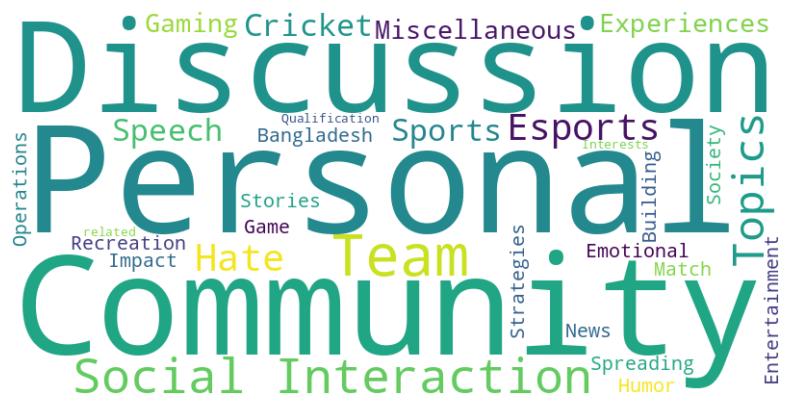

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine topics into a single string
text = ' '.join(topics)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


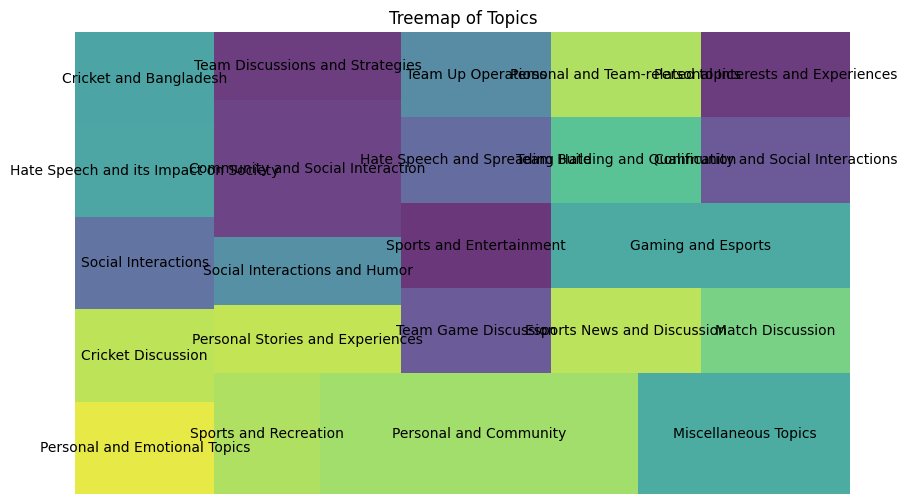

In [11]:
import squarify
import matplotlib.pyplot as plt

topic_counts = Counter(topics)

# Plot a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=list(topic_counts.values()), label=list(topic_counts.keys()), alpha=0.8)
plt.title('Treemap of Topics')
plt.axis('off')
plt.show()


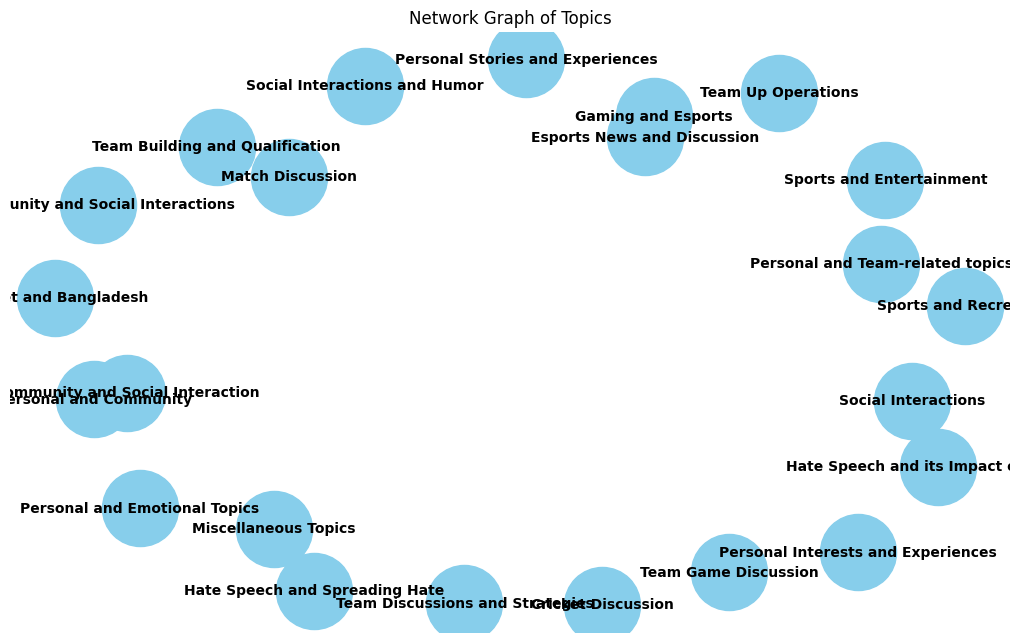

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a graph (add edges between similar topics based on some criteria)
G = nx.Graph()
G.add_nodes_from(topics)

# Manually adding some edges for illustration (replace this with your own criteria)
G.add_edges_from([('Personal and Community', 'Community and Social Interaction'), 
                  ('Gaming and Esports', 'Esports News and Discussion')])

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title('Network Graph of Topics')
plt.show()


In [2]:
bd_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/bangladesh_video_info.csv')
br_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/brasil_video_info.csv')
ind1_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/india_video_info.csv')
ind2_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/indiav2_video_info.csv')
id_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/indonesia_video_info.csv')
ml_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/malaysia_video_info.csv')
pk_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/pakistan_video_info.csv')
tr_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/turkey_video_info.csv')
vn_vinfo = pd.read_csv('/kaggle/input/esports-data/video_information/vietnam_video_info.csv')


ind_vinfo = pd.concat([ind1_vinfo, ind2_vinfo], ignore_index=True)

bd_vinfo = bd_vinfo.sort_values(by='date', ascending=False).reset_index(drop=True)

dfs = [bd_vinfo, br_vinfo,  ind_vinfo, id_vinfo, ml_vinfo, pk_vinfo, tr_vinfo, vn_vinfo]

names = ['bd_vinfo', 'ind_vinfo', 'id_vinfo', 'ml_vinfo', 'pk_vinfo', 'vn_vinfo']

for name, df in zip(names, dfs):
    print(f"Length of {name}: {len(df)}")

Length of bd_vinfo: 478
Length of ind_vinfo: 491
Length of id_vinfo: 567
Length of ml_vinfo: 464
Length of pk_vinfo: 502
Length of vn_vinfo: 475


In [3]:
warnings.filterwarnings('ignore')

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.ticker import FuncFormatter

# # Data
# # Data
# datasets = ['Banglaedesh', 'India', 'Pakistan', 'Vietnam', 'Malaysia', 'Indonesia']
# unique_commentators = [71862, 710140, 91151, 71613, 244855, 746772]

# # Determine the index of the maximum value
# max_index = unique_commentators.index(max(unique_commentators))

# # Set the style for the plot
# sns.set(style="whitegrid")

# # Create a color list with the same color for all bars except the maximum value
# colors = ['gray' if i != max_index else 'blue' for i in range(len(unique_commentators))]

# # Create a bar plot
# plt.figure(figsize=(15, 6))
# sns.barplot(x=datasets, y=unique_commentators, palette=colors)

# # Customize the y-axis to show values in millions
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))

# # Customize the plot
# plt.title("Unique Commentators Across Different Datasets", fontsize=18, fontweight='bold')
# plt.xlabel("Country", fontsize=16)
# plt.ylabel("Number of Unique Commentators", fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# # Add text labels on the bars
# for i, v in enumerate(unique_commentators):
#     plt.text(i, v + 10000, f'{v:,}', ha='center', fontsize=12, fontweight='bold')

# # Display the plot
# plt.tight_layout()
# plt.show()


In [8]:
nplc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/nepal_livechat_data.parquet')
len(nplc)

unique = len(nplc['video_id'].unique())
len(nplc)/ unique

11248.47619047619

In [6]:
bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/bangladesh_livechat_data.parquet')
# brlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/brasil_livechat_data.parquet')
idlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/indonesia_livechat_data.parquet')
mllc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/malaysia_livechat_data.parquet')

pklc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/pakistan_livechat_data.parquet')
indlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/india_livechat_data.parquet')
ind2lc = pd.read_parquet('/kaggle/input/esports-data/live_comments/indiav2_livechat_data.parquet')
# trlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/turkey_livechat_data.parquet')
vnlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/vietnam_livechat_data.parquet')

In [9]:
inlc = pd.concat([indlc, ind2lc], ignore_index=True)

In [10]:
dfs_lc = ['bdlc', 'idlc', 'mllc', 'pklc', 'inlc', 'vnlc']
sm = 0
for df_name in dfs_lc:
    df = globals()[df_name]
    print(f"Length of {df_name}: {len(df)/1e6:.2f}M")
    sm+=len(df)

print(f'Total is {sm/1e6:.2f}M')
print(f'Total in crore {sm/1e7:.2f}Corer')

Length of bdlc: 2.80M
Length of idlc: 6.97M
Length of mllc: 3.25M
Length of pklc: 3.38M
Length of inlc: 9.13M
Length of vnlc: 1.41M
Total is 26.94M
Total in crore 2.69Corer


In [11]:
inlc.author.nunique()

710140

In [12]:
print(f'Unique Commentators {bdlc.author.nunique()}')

print(f'Unique Commentators {inlc.author.nunique()}')

print(f'Unique Commentators {pklc.author.nunique()}')

print(f'Unique Commentators {vnlc.author.nunique()}')

print(f'Unique Commentators {mllc.author.nunique()}')


print(f'Unique Commentators {idlc.author.nunique()}')

Unique Commentators 71862
Unique Commentators 710140
Unique Commentators 91151
Unique Commentators 71613
Unique Commentators 244855
Unique Commentators 746772


In [13]:
bdlc.head()

,datetime,author,message,video_id
0,2022-08-12 09:22:22,Rizvan,hii,oiqpD3C_dLo
1,2022-08-12 09:22:35,Rizvan,#2d,oiqpD3C_dLo
2,2022-08-12 09:25:29,RN KAKASHI,3rd,oiqpD3C_dLo
3,2022-08-12 09:30:17,Kirree Nafee,Soul:face_vomiting::face_vomiting::face_vomiti...,oiqpD3C_dLo
4,2022-08-12 09:32:09,Fahim Tanvir,:rocket::rocket::rocket:,oiqpD3C_dLo


In [14]:
bdlc.video_id.value_counts().sort_index()

video_id
-9K-gjkFWi0    18552
-BYeqeRCOjU    10361
-Ce6WTSYRmc     4624
-J-xKzP9kMU     2791
-MPMbTWmF0I     3721
               ...  
zUctG3yk8_g      243
zhu4n2gCxeE     6992
zj5IaOfJRVY     4600
zo565CS9dTM     5240
zy5vMBBNyLQ     1131
Name: count, Length: 476, dtype: int64

In [15]:
top_k = bdlc['video_id'].value_counts().head(10)
print(top_k)

video_id
mK5YoRwGZWE    40954
oYSS7grPPk8    36931
PS5P8M_Kr9w    32782
3vDMdsayXlA    32400
jjzvGiYlyJw    31497
mEUCFvNh-n0    31399
o28TL2ntoBs    31388
Ua9pGbecEVY    30010
tVrLjcI4UaI    29870
WTof6r27eU4    29818
Name: count, dtype: int64


In [16]:
topk = bdlc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

print("Video IDs:", video_ids)
print("Counts:", counts)

Video IDs: ['mK5YoRwGZWE', 'oYSS7grPPk8', 'PS5P8M_Kr9w', '3vDMdsayXlA', 'jjzvGiYlyJw', 'mEUCFvNh-n0', 'o28TL2ntoBs', 'Ua9pGbecEVY', 'tVrLjcI4UaI', 'WTof6r27eU4', 'an_2b1K3Nzs', '0FlCtPKZQcU', 'VcGK4Ahbfvo', '5hPFiTzXcZI', 'rAK5YHJFzzg', 'UZlNkHUFA-c', 'NNcC1ep1PsI', 'P3kWApIbfDQ', 'phkxa-HKZbE', 'R0MZfE8eVx8', 'pr1TI8nLn04', '49AtPpmrnN4', 'NOPxITaEQ4Y', 'MxpECSz4d2k', 'ePhT0r3T8qA', 'U6i-iIdfJJA', 'Z79hzJuI7jk', '5YCnTaXjuNU', 'ulb845JAaaM', 'GgCdm0eyUZw', 'xVLF1Ifj7pI', '4D5QvYnU3cs', 'fBCaQ5ILWe4', '_QE1Nc8PYFo', '2LliDj8fFIU', 'WRKGX8PxchM', 'nExVTkNLw28', 'nwGiMINEHTw', 'G88oO3MquH0', 'COVKx88mjgM', 'Bw269HLzJh4', '-9K-gjkFWi0', 'ff3-Dzuedrg', 'QekV_RYwDiU', '1Qi9lgaA4Yw', 'H-SWqmU9f6M', '0sb-I1dO-dE', 'SGOzdu9A8Dw', 'nybiesPuLlI', 'y_XsDfcw20I']
Counts: [40954, 36931, 32782, 32400, 31497, 31399, 31388, 30010, 29870, 29818, 29812, 29741, 29483, 28886, 28433, 28179, 27692, 27275, 27200, 26907, 26290, 26050, 25628, 25368, 24765, 24701, 24608, 23599, 22814, 22555, 22024, 21996, 21548

In [17]:
filt = bd_vinfo[bd_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xl[:5]

['[BANGLA] 2024 PMSL CSA Qualifier SA Finals Day 3 | Spring',
 '[BANGLA] 2022 PMNC দক্ষিণ এশিয়া ওয়াইল্ড কার্ড | গ্র্যান্ড ফাইনালের ৪র্থ দিন',
 '[BANGLA] 2022 PMNC দক্ষিণ এশিয়া ওয়াইল্ড কার্ড |গ্র্যান্ড ফাইনাল ১ম দিন l শ্রেষ্ঠ হবার লড়াই শুরু আজ',
 '[BANGLA] 2022 PMPL South Asia Fall Split | Week 3 Day 5 | Who will Qualify for Grand Finals?',
 '[BANGLA] 2022 PMPL South Asia Fall Split | Week 2 Day 2 | Rise of New Heroes']

In [18]:
xls = " ".join(xl)

print(len(xls))
# xls

4263


In [19]:
dp = Counter(xls.split()).most_common(50)
rslt1 = pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt1[:10]

,Word,Frequency
0,|,89
1,Day,29
2,-,29
3,[BENGALI],26
4,2021,25
5,PUBG,24
6,MOBILE,24
7,PMPL,21
8,South,21
9,Asia,21


In [20]:
topk = inlc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

filt = ind_vinfo[ind_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xls = " ".join(xl)

print(len(xls))
dp = Counter(xls.split()).most_common(50)
rslt2 = pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt2[:10]

3162


,Word,Frequency
0,|,55
1,Day,42
2,[Hindi],31
3,iQOO,30
4,INDIA,27
5,BATTLEGROUNDS,26
6,MOBILE,26
7,Finals,25
8,-,24
9,2021,22


In [21]:
topk = pklc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

filt = pk_vinfo[pk_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xls = " ".join(xl)

print(len(xls))
dp = Counter(xls.split()).most_common(50)
rslt3 = pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt3[:10]

4040


,Word,Frequency
0,|,93
1,Day,48
2,PMPL,37
3,[URDU],30
4,South,30
5,Asia,30
6,PUBG,22
7,MOBILE,22
8,1,20
9,2021,20


In [22]:
topk = idlc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

filt = id_vinfo[id_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xls = " ".join(xl)

print(len(xls))
dp = Counter(xls.split()).most_common(50)
rslt4 = pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt4[:10]

4030


,Word,Frequency
0,|,98
1,PMPL,33
2,Day,25
3,[ID],21
4,Championship,20
5,PUBG,19
6,MOBILE,19
7,2,18
8,1,18
9,S4,18


In [23]:
topk = mllc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

filt = ml_vinfo[ml_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xls = " ".join(xl)

print(len(xls))
dp = Counter(xls.split()).most_common(50)
rslt5= pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt5[:10]

4279


,Word,Frequency
0,|,90
1,[BM],32
2,PMPL,31
3,Championship,24
4,2021,23
5,akan,22
6,PUBG,21
7,MOBILE,21
8,MY/SG,17
9,SEA,15


In [24]:
topk = vnlc['video_id'].value_counts().head(50)
video_ids = topk.index.tolist()  # List of top 10 video_ids
counts = topk.values.tolist()    # List of their counts

filt = vn_vinfo[vn_vinfo['video_id'].isin(video_ids)].reset_index(drop=True)
xl = filt['title'].tolist()
xls = " ".join(xl)

print(len(xls))
dp = Counter(xls.split()).most_common(50)
rslt6 = pd.DataFrame(dp, columns=['Word', 'Frequency'])
rslt6[:10]

4224


,Word,Frequency
0,|,92
1,PUBG,35
2,MOBILE,35
3,[VN],28
4,3,17
5,-,16
6,🔴,14
7,SEA,14
8,2,14
9,League,14


In [25]:
print(set(rslt1.Word.tolist()))

{'Week', 'PMNC', 'Finals', 'Spring', 'Season', '1', 'মোবাইল', 'Pro', 'ফাইনালস', '[BENGALI]', '2022', '|', 'Grand', 'S3', 'Bangladesh', 'Asia', 'National', 'East', '[BANGLA]', 'PMCC', 'League', 'কি', '2021', '[Bengali]', 'for', '2', '3', '-', 'Championship', 'Group', '4', 'New', 'দিন', 'MOBILE', '২০২১', 'এশিয়া', 'Stage', 'PMWI', 'সাউথ', 'ফাইনাল', 'গ্র্যান্ড', 'Esports', '[EN]', 'Day', 'Split', 'PUBG', 'PMPL', 'Fall', 'South', 'পাবজি'}


In [28]:
# Convert each 'Word' column to a set
set1 = set(rslt1['Word'].tolist())
set2 = set(rslt2['Word'].tolist())
set3 = set(rslt3['Word'].tolist())

# set4 = set(rslt4['Word'].tolist())
# set5 = set(rslt5['Word'].tolist())
# set6 = set(rslt6['Word'].tolist())


# Find the union of these sets
union_set = set1 | set2 | set3 #| set4 | set5 | set6

print(union_set)

{'LOCO', '[DAY', '[Hindi]', '2023:', 'Finals', 'Spring', 'Season', '1', 'মোবাইল', 'Pro', 'ফাইনালস', '[HINDI]', 'Regional', '2022', '|', 'Bangladesh', 'Survive', 'National', '[BANGLA]', 'League', 'Face', 'Pakistan', 'the', 'BMOC', 'কি', '2021', '[Bengali]', 'for', 'Final', 'Conquer', 'Off', '[UR]', 'Round', 'Group', 'New', 'MOBILE', 'এশিয়া', 'Stage', 'PMWI', 'Semi', 'By', 'ফাইনাল', 'ka', 'গ্র্যান্ড', 'Day', 'BGMI', 'PMPL', 'Powered', 'Fall', '[EN]', 'South', 'THE', 'LAUNCH', 'DAY', 'Stages', 'Week', 'PMNC', 'FINALS', '[GRAND', 'BGIS', '[BENGALI]', 'Superweekend', 'BATTLEGROUNDS', 'Top', 'Grand', 'iQOO', 'Quarter', '6', 'S3', 'BMPS', 'Asia', 'East', 'Global', 'PARTY', 'PMCC', '2020', 'Grind', '2', '3', '-', 'PMCO', 'Finale', 'to', 'Championship', '4', 'দিন', '২০২১', 'Can', 'INDIA', 'Red', 'PMGC', 'DRS', 'সাউথ', 'Play', '2023', 'SERIES', 'Esports', 'Loco', 'Split', 'The', 'S4', 'PUBG', 'S2', '[URDU]', 'পাবজি'}


## Top Comments

In [29]:
bdlc.head(3)

,datetime,author,message,video_id
0,2022-08-12 09:22:22,Rizvan,hii,oiqpD3C_dLo
1,2022-08-12 09:22:35,Rizvan,#2d,oiqpD3C_dLo
2,2022-08-12 09:25:29,RN KAKASHI,3rd,oiqpD3C_dLo


In [30]:
import re

def count_words(text):
    # Remove punctuations using regular expression
    text_without_punctuations = re.sub(r'[^\w\s]', '', text)

    # Split the text into words based on whitespace characters
    words = text_without_punctuations.split()

    # Get the number of words
    word_length = len(words)

    return word_length

In [31]:
from tqdm import tqdm
tqdm.pandas()

In [32]:
bdlc['wordcount'] = bdlc.message.progress_apply(count_words)

100%|██████████| 2796193/2796193 [00:25<00:00, 108445.00it/s]


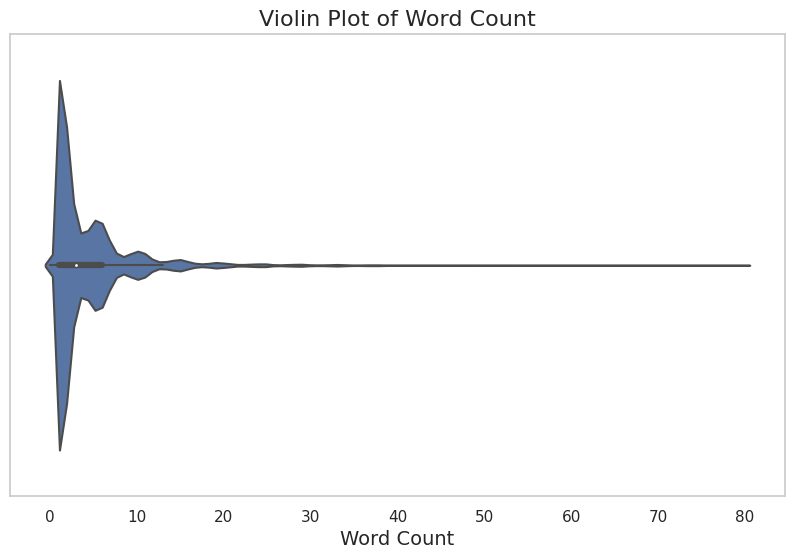

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['wordcount'] contains numerical data
plt.figure(figsize=(10, 6))
sns.violinplot(x=bdlc['wordcount'])

# Customize the plot
plt.title('Violin Plot of Word Count', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.grid(False)
plt.show()


In [36]:
bdlc = bdlc.sort_values(by='wordcount', ascending=False).reset_index(drop=True)

In [37]:
import emoji

def replace_emoji_codes(text):
    """
    Replace text-based emoji codes with actual emojis using the `emoji` library.

    Parameters:
    - text (str): The input text containing emoji codes.

    Returns:
    - str: The text with emoji codes replaced by actual emojis.
    """
    # Convert text-based emoji codes to actual emojis
    return emoji.emojize(text)

# Example usage
text = "A1 :red_heart: A1 :red_heart:"
converted_text = replace_emoji_codes(text)
print(converted_text)  # Output: "A1 ❤️ A1 ❤️"


A1 ❤️ A1 ❤️


In [38]:
tqdm.pandas()
bdlc['message'] = bdlc.message.progress_apply(replace_emoji_codes)
bdlc.head(2)

100%|██████████| 2796193/2796193 [00:37<00:00, 75112.75it/s] 


,datetime,author,message,video_id,wordcount
0,2021-03-27 12:43:33,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80
1,2021-03-27 12:31:20,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80


In [39]:
inlc['message'] = inlc.message.progress_apply(replace_emoji_codes)
pklc['message'] = pklc.message.progress_apply(replace_emoji_codes)


100%|██████████| 3377028/3377028 [00:38<00:00, 87328.05it/s] 


In [40]:
def word_freq(df, lim=50)    :
    xl = df['message'].tolist()
    xls = " ".join(xl)

    print(len(xls))
    dp = Counter(xls.split()).most_common(lim)
    result = pd.DataFrame(dp, columns=['Word', 'Frequency'])
    return result

In [41]:
bfq = word_freq(bdlc, 100)

print(bfq.Word.tolist())

infq = word_freq(inlc, 100)
print('\n')
print(infq.Word.tolist())


84854922
['A1', 'op', 'er', 'a1', 'team', 'na', 'fs', '❤️', 'e', 'ki', 'GSM', 'gsm', 'hate', 'FS', 'OP', '1952', 'ar', 're', 'vai', 'a', 'bot', 'এর', 'match', 'fan', 'gg', 'is', 'nai', 'chicken', 'the', 'bd', 'to', 'love', 'for', 'BD', 'ines', 'in', 'r', 'ra', '#PUBGMOBILE', 'venom', 'না', '#PMCC', 'sinister', 'kore', 'and', 'from', 'Bangladesh', 'ke', 'no', 'ta', 'kill', 'khela', 'support', 'zone', 'o', 'tor', '1', 'k', 'bal', 'bhai', 'te', 'hacker', 'pmpl', 'qualify', 'best', 'INES', 'noob', 'Fs', 'of', 'valo', 'ভাই', 'tear', 'koi', 'top', 'khele', '❤️❤️', 'badrev', 'free', 'ei', 'are', 'কে', 'hobe', 'player', 'der', 'কি', 'gula', '2', 'lol', 'back', 'জসিম', 'final', 'করে', 'pmgc', 'টিম', 'আর', 'theke', 'Gsm', 'Op', 'ami', '😂']
204618578


['op', 'soul', '❤️', 'lite', 'godl', 'bgmi', 'hai', 'OP', 'tx', 'is', 'hydra', 'BGMI', 'scout', 'godlike', 'to', 'team', 'ka', 'match', 'in', 'the', 'se', 'bhai', 'ko', 'TX', 'kya', 'for', '1', 'Jonathan', 'h', 'chal', 'mortal', 'LITE', 'and', 'GOD

In [38]:
pkfq = word_freq(pklc, 100)
print('\n')
print(pkfq.Word.tolist())

mlfq = word_freq(mllc, 100)
print('\n')
print(mlfq.Word.tolist())

92630945


['i8', 'op', 'ko', 'hai', 'bablu', '❤️', 'star', 'ki', 'ka', 'is', 'team', 'to', 'ha', 'in', 'k', 'OP', 'and', 'gg', '247', 'the', 'na', 'ho', 'I8', 'ke', 'for', 'teams', 'bhai', 'nhi', 'se', 'chicken', 'Pakistan', 'match', 'on', 'or', 'fs', 'kr', 'bhi', 'top', 'of', 'love', 'Bablu', 'me', 'hate', '😂', 'BABLU', 'he', 'no', 'kro', 'ni', 'tha', 'uzm', 'zone', 'ye', 'Star', 'are', 'do', 'h', 'koi', 'hi', 'ma', 'hain', 'crypto', 'r3d', 'hacker', 'will', 'nahi', 'a', 'like', 'STAR', '1', 'you', 'ab', 'Op', 'ne', 'inshallah', '3', 'kills', 'ban', 'qualify', 'kar', 'from', '2', '😆', 'ya', 'not', 'kia', 'kya', 'aur', 'pak', '4', 'they', 'karo', 'support', 'pakistan', 'wo', 'be', 'Allah', 'F4', 'points', '😂😂']
89586547


['ni', 'k', 'ts', 'toxic', 'la', 'tu', 'TS', 'main', 'team', 'tak', 'ke', 'je', 'yg', 'indo', 'btr', 'BTR', 'malaysia', 'go', 'nak', 'dah', 'aku', 'ada', 'MALAYSIA', 'nk', '1', 'Malaysia', 'lah', 'geek', 'kau', 'x', 'dh', 'yang', ',', 'gg', 'pun', 'lagi', 'boleh', 'm

## LFR plot

In [43]:
def freq_count(df, word_to_check):
    xl = df['message'].tolist()

    # Join the list into a single string
    xls = " ".join(xl)
    # Count the frequency of the word
    frequency = xls.lower().count(word_to_check.lower())

    return [word_to_check, frequency, int(1e9*(frequency/len(xls)))]

In [44]:
xb = freq_count(bdlc, 'threat')
xi = freq_count(inlc, 'threat')

In [44]:
print(xb[2]*1e9)
print(xb)

print(xi[2]*1e9)
print(xi)

# print(np.log)

409051000000000.0
['support', 34710, 409051]
337479000000000.0
['support', 31261, 337479]


In [50]:
# Negative words
negative_keywords = ['Annoying', 'Trash', 'Lagging', 'Cheating', 'Loser']

# Positive words
positive_keywords = ['Amazing', 'Awesome', 'Winner', 'Great job', 'Entertaining']

# keywords = ['Trash', 'Loser', 'Toxic', 'Hate', 'Cheating', 'danger', 'winner', 'safe',  'love', 'awsome', 'Family', 'support']

keywords = ['Crime', 'Threat', 'Toxic', 'Hate', 'Love', 'Fan', 'Family', 'support']

frbd = []
frin = []
for word in tqdm(keywords):
    xb = freq_count(bdlc, word)
    xi = freq_count(inlc, word)
    frbd.append([xb[1], xb[2]])
    frin.append([xi[1], xi[2]])

100%|██████████| 8/8 [01:06<00:00,  8.37s/it]


In [46]:
print(frbd)
print(frin)

[[239, 2816], [120, 1414], [12463, 146874], [93638, 1103506], [447, 5267], [384, 4525], [1355, 15968], [479, 5644], [58520, 689647], [6, 70], [1125, 13257], [34710, 409051]]
[[581, 2839], [739, 3611], [11137, 54428], [106358, 519786], [2312, 11299], [30201, 147596], [11071, 54105], [2041, 9974], [48878, 238873], [39, 190], [8518, 41628], [7491, 36609]]


In [47]:
ab = np.array(frbd)
print(np.array(frin)[:,0])
ab[:,0]

[   581    739  11137 106358   2312  30201  11071   2041  48878     39
   8518   7491]


array([  239,   120, 12463, 93638,   447,   384,  1355,   479, 58520,
           6,  1125, 34710])

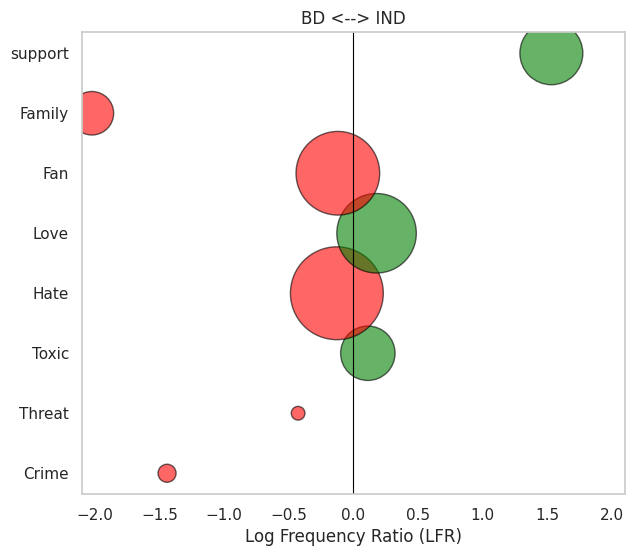

In [52]:
# Frequency data
freq_bd = np.array(frbd)
freq_ind = np.array(frin)
freq_bd = freq_bd[:,0]
freq_ind = freq_ind[:,0]

# Smoothing parameter
k = 0.5

# Calculate LFR
lfr_values = np.log((freq_bd + k) / (freq_ind + k))

# Calculate the size of the scatter points based on frequency counts
sizes = np.sqrt(freq_bd + freq_ind) * 10  # Adjust the multiplication factor for better visualization

# Plotting
plt.figure(figsize=(7, 6))
plt.scatter(lfr_values, keywords, s = sizes, color=np.where(lfr_values > 0, 'green', 'red'), alpha=0.6, edgecolors='black')
plt.axvline(0, color='black', linewidth=0.8)  # Line at LFR = 0

# Add labels and title
plt.xlabel('Log Frequency Ratio (LFR)')
# plt.ylabel('Keywords')
plt.title('BD <--> IND')
plt.xlim([-2.1,2.1])

# Add grid for better readability
plt.grid(False)

# Display the plot
plt.show()


In [58]:
keywords = ['Crime', 'Threat', 'Toxic', 'Hate', 'Love', 'Fan', 'Family', 'support']

frbd = []
frin = []
frpk = []
for word in tqdm(keywords):
    xb = freq_count(bdlc, word)
    xi = freq_count(inlc, word)
    xt = freq_count(pklc, word)
    frbd.append([xb[1], xb[2]])
    frin.append([xi[1], xi[2]])
    frpk.append([xt[1], xt[2]])

100%|██████████| 8/8 [01:25<00:00, 10.69s/it]


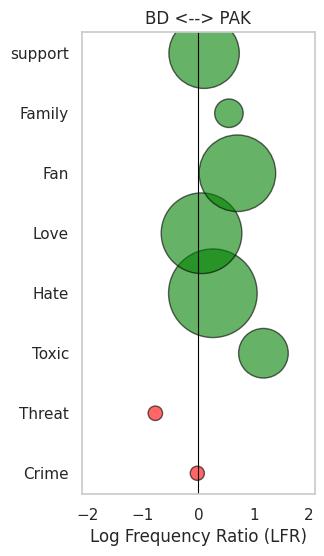

In [57]:
# Frequency data
freq_bd = np.array(frbd)
freq_ind = np.array(frin)
freq_bd = freq_bd[:,0]
freq_ind = freq_ind[:,0]
keywords = ['Crime', 'Threat', 'Toxic', 'Hate', 'Love', 'Fan', 'Family', 'support']

# Smoothing parameter
k = 0.5

# Calculate LFR
lfr_values = np.log((freq_bd + k) / (freq_ind + k))

# Calculate the size of the scatter points based on frequency counts
sizes = np.sqrt(freq_bd + freq_ind) * 10  # Adjust the multiplication factor for better visualization

# Plotting
plt.figure(figsize=(3, 6))
plt.scatter(lfr_values, keywords, s=sizes, color=np.where(lfr_values > 0, 'green', 'red'), alpha=0.6, edgecolors='black')
plt.axvline(0, color='black', linewidth=0.8)  # Line at LFR = 0

# Add labels and title
plt.xlabel('Log Frequency Ratio (LFR)')
# plt.ylabel('Keywords')
plt.title('BD <--> PAK')
plt.xlim([-2.1,2.1])

# Add grid for better readability
plt.grid(False)

# Display the plot
plt.show()


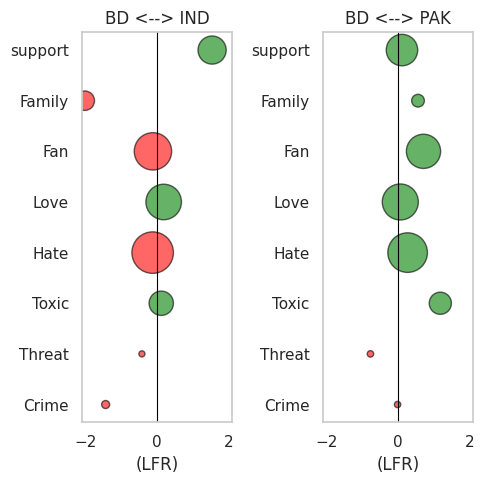

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency data
freq_bd = np.array(frbd)[:, 0]
freq_ind = np.array(frin)[:, 0]
freq_pak = np.array(frpk)[:, 0]

keywords = ['Crime', 'Threat', 'Toxic', 'Hate', 'Love', 'Fan', 'Family', 'support']

# Smoothing parameter
k = 0.5

# Calculate LFR for India and Pakistan
lfr_values_ind = np.log((freq_bd + k) / (freq_ind + k))
lfr_values_pak = np.log((freq_bd + k) / (freq_pak + k))

# Calculate the size of the scatter points based on frequency counts
sizes_ind = np.sqrt(freq_bd + freq_ind) * 2
sizes_pak = np.sqrt(freq_bd + freq_pak) * 2

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# First plot: BD vs IND
axes[0].scatter(lfr_values_ind, keywords, s=sizes_ind, color=np.where(lfr_values_ind > 0, 'green', 'red'), alpha=0.6, edgecolors='black')
axes[0].axvline(0, color='black', linewidth=0.8)
axes[0].set_xlabel('(LFR)')
axes[0].set_xlim([-2.1, 2.1])
axes[0].set_title('BD <--> IND')
axes[0].grid(False)

# Second plot: BD vs PAK
axes[1].scatter(lfr_values_pak, keywords, s=sizes_pak, color=np.where(lfr_values_pak > 0, 'green', 'red'), alpha=0.6, edgecolors='black')
axes[1].axvline(0, color='black', linewidth=0.8)
axes[1].set_xlabel('(LFR)')
axes[1].set_xlim([-2.1, 2.1])
axes[1].set_title('BD <--> PAK')
axes[1].grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [56]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.current_device())  # Prints the ID of the current device
print(torch.cuda.get_device_name(0))  # Prints the name of the GPU

True
0
Tesla T4


In [31]:
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [32]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)
sentiment_task("Covid cases are increasing fast!")

2024-08-15 15:01:40.322956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 15:01:40.323059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 15:01:40.448618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'negative', 'score': 0.7235767841339111}]

In [43]:
demo = bdlc['message'][0]
print(demo)

sentiment_task("A1 red_heart red_heart red_heart red_heart red_heart")

A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: A1 :red_heart: 


[{'label': 'neutral', 'score': 0.769365131855011}]

A1 ❤️ A1 ❤️


In [35]:
filt = bdlc[:50_0].copy()
filt.head(2)

,datetime,author,message,video_id,wordcount
0,2021-03-27 12:34:10,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80
1,2021-03-27 12:49:48,Tanzin Mahamud,A1 :red_heart: A1 :red_heart: A1 :red_heart: A...,4D5QvYnU3cs,80


In [36]:
tqdm.pandas()
filt['message'] = filt.message.progress_apply(replace_emoji_codes)
filt.head(2)

100%|██████████| 500/500 [00:00<00:00, 18545.41it/s]


,datetime,author,message,video_id,wordcount
0,2021-03-27 12:34:10,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80
1,2021-03-27 12:49:48,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80


In [44]:
def make_pred(text):
    return sentiment_task(text)[0]['label']

make_pred('i love you.')

'positive'

In [58]:
filt['sentiment'] = filt.message.progress_apply(make_pred)

100%|██████████| 500/500 [00:07<00:00, 69.14it/s]


In [59]:
filt.head()

,datetime,author,message,video_id,wordcount,sentiment
0,2021-03-27 12:34:10,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80,positive
1,2021-03-27 12:49:48,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80,positive
2,2021-03-27 12:53:52,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80,positive
3,2021-03-27 13:05:37,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80,positive
4,2021-03-27 12:31:21,Tanzin Mahamud,A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤️ A1 ❤...,4D5QvYnU3cs,80,positive


In [60]:
filt.sentiment.value_counts()

sentiment
neutral     320
positive    176
negative      4
Name: count, dtype: int64

In [51]:
# xf = filt[filt['sentiment']=='negative']
# xf.message.tolist()

["I am sorry I didn't get back to you earlier but I was out of town for a few days and I was out of town for a few days and I was out of town for a few days and I was out of town for a few days and I",
 'Nah I’m sure I have some of that type in that direction and the ☕ of my head are in my heart 💜 and I’m a bit of the ☕ of my body but it’s so bad that I’m a bit nervous 😩 I’m sure it’s hard not jus',
 'The first thing I did was to be a part of the world and the other is a great way to get the best out of the way and I have to say that I am not a fan of the most important things to do in the future',
 'Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 Where is GSM??? 😕 😕 😕 ']

In [63]:
make_pred('hi')

'neutral'